## Tarea 2 - Miguel Raz

## Ejercicio 1

Consideraren la siguiente definición de la derivada, que podemos llamar
*derivada de paso complejo*:

$$
f^\prime(x_0) \equiv \lim_{h\to 0} \textrm{Im}\left(\frac{f(x_0+i h)}{h}\right),
$$

donde 

* $i^2 = -1$, 
* $\textrm{Im}(z)$ es la parte imaginaria de $z$.

1. Estudien el comportamiento del error de la derivada de paso complejo, como
lo hicimos en clase, simulando el límite $h→0$.

2. Expliquen analíticamente los resultados numéricos obtenidos.


NOTA: En caso de que se atoren, o que el tema les interese más, ver
[este artículo](https://epubs.siam.org/doi/epdf/10.1137/S003614459631241X)
y/o [esta liga](https://nhigham.com/2020/10/06/what-is-the-complex-step-approximation/).



In [107]:
f1(f, x, h) = (f(x + h) - f(x - h))/(2h)
f2(f, x, h) = imag(f(x + im*h))/h
f(x) = exp(x)
x_0 = 1.0

1.0

In [108]:
hs = logrange(1e-1, 1e-12, 1000) |> collect;
# Tomamos los valores absolutos de los errores relativos:
y1s = abs.((f1.(f, x_0, hs) .- f(x_0)) ./ f(x_0));
y2s = abs.((f2.(f, x_0, hs) .- f(x_0)) ./ f(x_0));
ticks = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

12-element Vector{Float64}:
 0.1
 0.01
 0.001
 0.0001
 1.0e-5
 1.0e-6
 1.0e-7
 1.0e-8
 1.0e-9
 1.0e-10
 1.0e-11
 1.0e-12

In [109]:
using Plots

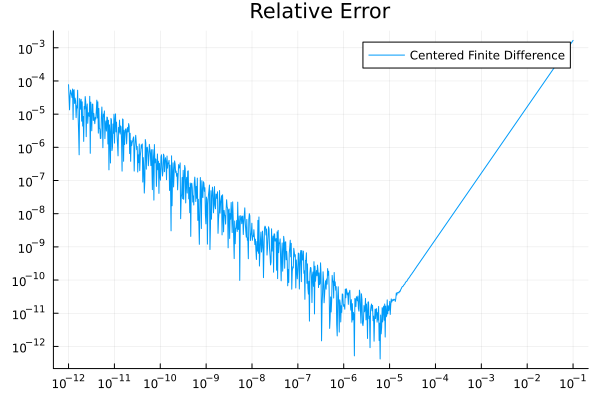

In [110]:
p = Plots.plot(hs, y1s, xaxis = :log10, yaxis = :log10, label = "Centered Finite Difference", xticks = ticks, yticks = ticks, title = "Relative Error")

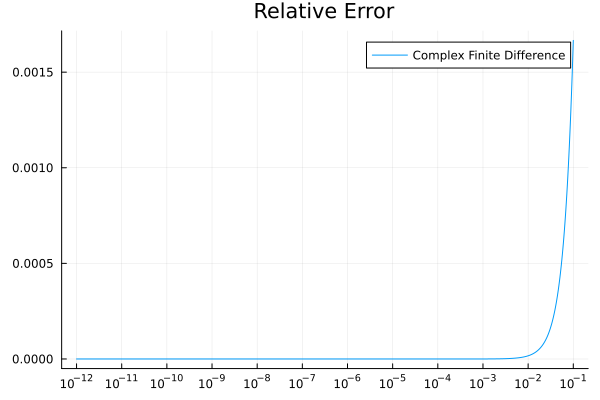

In [112]:
nn = findfirst(iszero, y2s) - 1
p2 = Plots.plot(hs[1:nn], y2s[1:nn], label = "Complex Finite Difference", xaxis = :log10, yaxis = :log10, xticks = ticks, title = "Relative Error")

## Ejercicio 2

 - A partir de $\mathbb{D}_{x_0}u \cdot \mathbb{D}_{x_0}w$, obtengan la expresión para
 $\mathbb{D}_{x_0}z = \mathbb{D}_{x_0}u / \mathbb{D}_{x_0}w$. Es decir, demuestren
 el resultado obtenido para la división de duales.



Lema:


* $\mathbb{D}_{x_0} (u \cdot w) = \mathbb{D}_{x_0} u \cdot \mathbb{D}_{x_0} w = \big( u_0 w_0,\, u_0 w'_0 +  w_0 u'_0 \big)$



Demostracion:

* $\mathbb{D}_{x_0}z = \frac{\mathbb{D}_{x_0}u}{\mathbb{D}_{x_0}w}$

Por definicion, $\mathbb{D}_{x_0} = x_0 + \epsilon$, por lo tanto:

* $\mathbb{D}_{x_0}z = \frac{u_0 + \epsilon}{w_0 + \epsilon}$

Multiplicando por el conjugado del denominador:

* $\mathbb{D}_{x_0}z = \frac{u_0 + \epsilon}{w_0 + \epsilon} \left(\frac{w_0 - \epsilon}{w_0 - \epsilon}\right)$

* $\mathbb{D}_{x_0}z = \frac{w_0 u_0 + w_0 \epsilon - u_0 \epsilon - \epsilon^2}{w_0^2}$

Y como $\epsilon^2 = 0$ para los duales, y $(u_0, 1) = u_0 + \epsilon$,


* $\mathbb{D}_{x_0}z = \left(\frac{u_0 w_0}{w_0^2}, \frac{w_0 \epsilon - u_0 \epsilon}{w_0^2}\right)$

Por lo tanto,

* $\mathbb{D}_{x_0}z = \left(\frac{u_0 w_0}{w_0^2}, \frac{u_0' w_0- u_0 w_0'}{w_0^2}\right)$

## Ejercicio 3

 - Definan una estructura en Julia `Dual` que represente a los números duales;
 los nombres de los campos internos serán `fun` y `der`.
 Por sencillez, pueden considerar que los campos de `Dual` son del tipo `Float64`,
 aunque pueden *osar* y atreverse a implementar el caso paramétrico `Dual{T <: Real}`,
 donde `T` es el tipo de *ambos* campos.

 - Sobrecarguen las operaciones de tal manera que las cuatro operaciones aritméticas
 que involucran dos `Dual`es, den el resultado que se espera.

 - Definan un método específico para crear duales (constructor externo), a partir de
 un sólo valor (en lugar de los dos requeridos), y que corresponderá a
 $\mathbb{D}_{x_0}c = (c, 0)$, donde $c$ es una constante (real).

 - Extiendan los métodos que permitan sumar/restar y multiplicar/dividir un
 número (`::Real`) y un `::Dual`. (Recuerden que ciertas operaciones son conmutativas!).
 NOTA: Este ejercicio lo pueden hacer escribiendo todos los métodos, uno a uno. Otra
 opción es usar `promote` y `convert` para definir reglas de promoción y conversión;
 [la documentación](https://docs.julialang.org/en/v1/manual/conversion-and-promotion/)
 tiene más información, por si este camino les interesa.

 - Definan las funciones `fun` y `der` que, al ser aplicadas a un `Dual` devuelvan
 la parte que corresponde a la función y la parte que corresponde a la derivada
 del `Dual`, respectivamente.

 - Incluyan varios casos (propuestos por ustedes mismos) donde se *compruebe*
 que lo que
 implementaron da el resultado que debería ser. Para esto, pueden usar la librería
 estándard [`Test`](https://docs.julialang.org/en/v1/stdlib/Test/) de Julia.



In [86]:
struct Dual
    fun::Float64
    der::Float64
end

Base.:+(x::Dual, y::Dual) = Dual(fun(x) + fun(y), der(x) + der(y))
Base.:-(x::Dual, y::Dual) = Dual(fun(x) - fun(y), der(x) - der(y))
Base.:*(x::Dual, y::Dual) = Dual(fun(x) * fun(y), der(x) * fun(y) + fun(x) * der(y))
Base.:/(x::Dual, y::Dual) = Dual(fun(x) / fun(y), (der(x) - (fun(x) / fun(y)) * der(y)) / fun(y))
Base.:^(x::Dual, y::Real) = Dual(fun(x) ^ y, y*fun(x)^(y-1)*der(x))

Base.:+(x::Dual, y::Real) = x + Dual(y)
Base.:+(x::Real, y::Dual) = Dual(x) + y
Base.:-(x::Dual, y::Real) = x - Dual(y)
Base.:-(x::Real, y::Dual) = Dual(x) - y
Base.:*(x::Dual, y::Real) = x * Dual(y)
Base.:*(x::Real, y::Dual) = Dual(x) * y
Base.:/(x::Dual, y::Real) = x / Dual(y)
Base.:/(x::Real, y::Dual) = Dual(x) / y

Dual(x::Real) = Dual(x, 0.0)
fun(x::Dual) = x.fun
der(x::Dual) = x.der
fun(x::Real) = x
der(x::Real) = x

Base.isapprox(x::Dual, y::Dual) = fun(x) ≈ fun(y) && der(x) ≈ der(y)


In [58]:
using Test
@testset "Arithmetic" begin
    @test Dual(1,1) + Dual(2, 0) == Dual(3.0, 1.0)
    @test Dual(2, 1) * Dual(3, 0) - Dual(1, 0) == Dual(5.0, 3.0)
    @test fun(Dual(7.0)) == 7.0
    @test der(Dual(3)) == 0
    @test Dual(5, 1) ^ 3 == Dual(125, 75)
    @test Dual(9.0, 1)^2.0 / (Dual(9.0, 1) + Dual(1.0, 0.0)) == Dual(8.1, 0.99)
    @test (Dual(5, 1) + Dual(1.0, 0.0))* (Dual(1.0)) == Dual(6, 1)
    @test Dual(1.0, 0.0) + 1 == 1 + Dual(1, 0)
    @test Dual(1.0, 0.0) + 1.0 == 1.0 + Dual(1.0, 0)
    @test 2 * Dual(1, 1) == 2 * Dual(1.0, 1.0)
    @test 3 / Dual(1, 1) == 3.0 / Dual(1.0, 1.0)
    @test Dual(2, 1) ^ 4 == Dual(2.0, 1.0) ^ 4.0
end;

Test Summary: | Pass  Total  Time
Arithmetic    |   12     12  0.0s


## Ejercicio 4

 Definan una nueva función `dual(x_0)` cuyo resultado sea un `Dual` que corresponde
 a la variable independiente $x$ evaluada en `x_0`. Con esta función
 obtengan $g'(2)$ para la función
 $$
 g(x) = \frac{3x^2-8x+1}{7x^3-1}.
 $$


In [25]:
g(x::Float64) = let x = Dual(x, 1)
    #(3x^2 - 8.0x + 1.0) / (7.0x^3 - 1.0)
    #3.0x^2 - 8.0x + 1.0 / (x + 1.0)
    (3x^2 - 8x + 1) /  (7x^3 - 1)
end
g(2.0)
# Wolfram dice g′(2) ≈ 0.156033
g′(x) = (-21x^4 + 112x^3 - 21x^2 - 6x + 8)/(7x^3 - 1)^2
@test der(g(2.0)) ==  g′(2.0)


Test Passed

## Ejercicio 5

 - A partir de lo visto en clase, *extiendan* las funciones `sin(a::Dual)`,
 `cos(a::Dual)`, `tan(a::Dual)`, `^(a::Dual, n::Int)`, `sqrt(a::Dual)`, `exp(a::Dual)`
 y `log(a::Dual)`, al igual que `a^n`, con `a::Dual` y `n::Int`.

 - Al igual que antes, construyan algún conjunto de pruebas que muestre, de manera
 sencilla, que lo que hicieron da lo que uno esperaría obtener.


In [59]:
import Base: sin, cos, tan, sqrt, exp, log
Base.sin(x::Dual) = Dual(sin(x.fun), cos(fun(x)) * der(x))
Base.cos(x::Dual) = Dual(cos(x.fun), -sin(fun(x)) * der(x))
Base.tan(x::Dual) = Dual(tan(x.fun), -sec(fun(x))^2 * der(x))
Base.sqrt(x::Dual) = Dual(sqrt(x.fun), .5/sqrt(fun(x)) * der(x))
Base.exp(x::Dual) = Dual(exp(x.fun), fun(x) * der(x))
Base.log(x::Dual) = Dual(log(x.fun), 1/fun(x) * der(x))

In [106]:
@testset "Trig" begin
    @test sin(Dual(0.0, 1.0)) == Dual(0, 1)
    @test cos(Dual(0, 1)) ≈ Dual(1.0, 0.0)
    @test tan(Dual(pi/4, 1)) ≈ Dual(1, -2)
    @test sqrt(Dual(9.0, 1.0)) == Dual(3.0, 1/6)
    @test exp(Dual(log(2), 1)) == Dual(2.0, log(2))
    @test log(Dual(10,2)) ≈ Dual(log(10), 0.2)
end

Test Summary: | Pass  Total  Time
Trig          |    6      6  0.0s


Test.DefaultTestSet("Trig", Any[], 6, false, false, true, 1.729104363627022e9, 1.729104363638727e9, false, "/home/mrg/school/2025-1_TSFC1/tareas/raz/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl")